In [16]:
from fastai.vision import imagenet_stats, DatasetType
from fastai.vision.data import get_image_files, SegmentationItemList
from fastai.vision.image import open_mask
from fastai.vision.learner import unet_learner
from fastai.vision.transform import get_transforms
from fastai.vision import models

import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import mlflow
import numpy as np
from PIL import Image

from corescore.mlflowregistry import MlflowRegistry


In [24]:
# Our mlflow registry URI
client = MlflowRegistry(URI)


learner = client.load_model('corescore')

OSError: No such file or directory: '/var/lib/mlflow/0/953b7196be8743b99ab94ec8b9f25da8/artifacts/model'

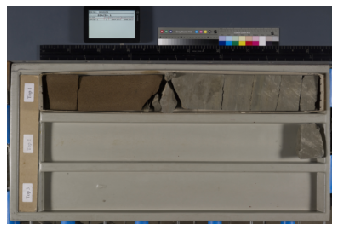

torch.Size([3, 256, 382])

In [3]:
preprocessing = transforms.Compose([
  transforms.Resize(256),
 # transforms.CenterCrop(224),
 transforms.ToTensor()
])

preprocessing_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

img = Image.open("Images/images_train_S00101254.jpeg")

preproc_img = preprocessing(img)

plt.imshow(preproc_img.permute(1,2,0)); plt.axis('off'); plt.show()
preproc_img.shape

In [4]:
preproc_img = preproc_img.unsqueeze(0)
preproc_img.shape

torch.Size([1, 3, 256, 382])

In [5]:
from fastai import *
from fastai.vision import *
tmp_img = open_image('Images/images_train_S00101254.jpeg')
pred_class, pred_idx, outputs = learner.predict(tmp_img)
print(pred_idx.shape)

/home/snake/locust/lib64/python3.6/site-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


torch.Size([1, 148, 1048])


In [6]:
numpy_array_image_mask = image2np(pred_class.data)
numpy_array_image_mask.shape

(148, 1048)

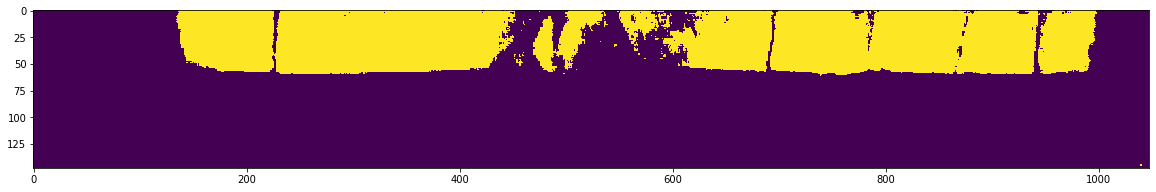

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(numpy_array_image_mask)

In [10]:
from captum.attr import IntegratedGradients
    
integrated_gradients = IntegratedGradients(learner.model)
attr_ig = integrated_gradients.attribute(preproc_img, target=5, n_steps=2)

AssertionError: Target not provided when necessary, cannot take gradient with respect to multiple outputs.